# Data Processing and Visualization
-----
**Assignment Topic: Data Analysis on Car Advertisements**


Student1 Name: Aki Oshima

SNumber: s-5373440

Student2 Name: Anon Kangpanich

SNumber: s-5367637

Student3 Name: Patrick Carey

SNumber: s-5407849

# Link to extra assignment




## https://observablehq.com/d/35bb1c11c77fc8f5

# Data Import

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np

In [ ]:
car_data = pd.read_csv("car_dataset.csv")
sellers_data = pd.read_csv('seller_dataset.csv')

# Data Exploration and Cleaning

## a. Statistics Computation

### Convert mileage data into numeric format

In [ ]:
car_data['mileage'] = car_data['mileage'].str.replace(' Km', '')


In [ ]:
car_data['mileage'] = car_data['mileage'].str.replace(',', '')

In [ ]:
car_data['mileage'] = car_data['mileage'].astype(int)

### Formatted display of float

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Mean, STD, Median of mileage, year of manufacturer, and price

In [ ]:
car_data[['mileage', 'year_of_manufacture', 'price (AUD)']].describe()

,mileage,year_of_manufacture,price (AUD)
count,30652.000,30620.000,30652.000
mean,412315.033,2017.320,42843.158
std,34899663.671,5.332,78585.588
min,0.000,1990.000,0.000
25%,0.000,2015.000,16396.798
50%,20000.000,2019.000,24939.327
75%,60000.000,2022.000,40445.434
max,4294967295.000,2023.000,2186239.686


### Mode of mileage, year of manufacturer, price

In [ ]:
car_data[['mileage', 'year_of_manufacture', 'price (AUD)']].mode()

,mileage,year_of_manufacture,price (AUD)
0,0,2023.000,40485.920


## b. Outliers and Missing Values

### Amount of cars information before selling

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30652 entries, 0 to 30651
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                30652 non-null  int64  
 1   origin               30652 non-null  object 
 2   condition            30652 non-null  object 
 3   car_model            30652 non-null  object 
 4   mileage              30652 non-null  int64  
 5   exterior_color       30652 non-null  object 
 6   interior_color       30652 non-null  object 
 7   num_of_doors         30652 non-null  object 
 8   seating_capacity     30652 non-null  object 
 9   engine               30652 non-null  object 
 10  fuel_system          6742 non-null   object 
 11  transmission         30652 non-null  object 
 12  drive_type           30652 non-null  object 
 13  fuel_consumption     30652 non-null  object 
 14  brand                30652 non-null  object 
 15  grade                30652 non-null 

Before cleaning: 30652 rows

### Cleaning up information about car manufacturer
There are 32 rows in the car_data where the Year of Manufacture column is missing information. Since the year of manufacture is context-dependent and varies by car model, it cannot be accurately predicted based on other values. Filling in these missing entries would require thorough research on a case-by-case basis.

In [ ]:
car_data = car_data.dropna(subset = ['year_of_manufacture'])
car_data['year_of_manufacture'] = car_data['year_of_manufacture'].astype(int)

<ipython-input-10-af70b82be12f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['year_of_manufacture'] = car_data['year_of_manufacture'].astype(int)


Rows in the "year_of_manufacture" column that are empty were left blank, as they should display the correct year.









### Removing car fuel system information

In [ ]:
del car_data['fuel_system']

We removed the "fuel_system" column as it contained inconsistent and random data, making it difficult to clean and ensure accuracy. Additionally, we deemed it unnecessary for our analysis.


### Cleaning up information about car engine

In [ ]:
car_data.loc[:, 'engine'] = car_data['engine'].str.replace(r'^electric.*', 'Electric', regex=True)
car_data.loc[:, 'engine'] = car_data['engine'].str.replace(r'^Electric\s*.*', 'Electric', regex=True)

Since electric cars use motors instead of engines, the "Engine displacement" data is incorrect and has been removed accordingly.









In [ ]:
car_data = car_data[car_data['engine'] != '-']

Rows in the "engine" column containing "-" were removed, as the data is unusable.









In [ ]:
car_data = car_data[~car_data['engine'].isin(['Diesel', 'Hybrid', 'Petrol'])]

To keep consistentcy, every engine data that doesn't contain engine displacement (except for electric) will be remove given that it's difficult to fine engine displacement for missing cars.

### Cleaning up information about car seating capacity

In [ ]:
car_data = car_data[(car_data['seating_capacity'] != '0-seat') & (car_data['seating_capacity'] != '1-seat')]

Since every car must have at least one seat and no valid data exists for a 1-seat car in the information we received, we decided to remove entries with this value.



In [ ]:
car_data = car_data[~car_data['seating_capacity'].str.contains(r'\b(4[0-9]|[5-9][0-9])-seat\b', regex=True)]

<ipython-input-16-413fc7bf2cd8>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  car_data = car_data[~car_data['seating_capacity'].str.contains(r'\b(4[0-9]|[5-9][0-9])-seat\b', regex=True)]


In [ ]:
car_data = car_data[(~car_data['seating_capacity'].str.contains(r'\b([1-2][0-9])-seat\b', regex=True)) | (car_data['car_model'] == 'Van/Minivan')]

<ipython-input-17-3525d61bd0b0>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  car_data = car_data[(~car_data['seating_capacity'].str.contains(r'\b([1-2][0-9])-seat\b', regex=True)) | (car_data['car_model'] == 'Van/Minivan')]


We removed minivans with 40 seats or more, and other types of cars with 10 seats or more based on the following considerations:

1.   Minivans can have up to 34–38 seats, but rarely exceed this range.
2.   Most other cars typically have 4–5 seats, with a few exceptions, but generally do not exceed 10 seats.







### Cleaning up information about mileage and car condition

In [ ]:
car_data.loc[(car_data['condition'] == 'New car') & (car_data['mileage'] != 0), 'mileage'] = 0

In [ ]:
car_data = car_data[(car_data['mileage'] < 5300000)]

In [ ]:
car_mileage_mean = car_data.copy()

In [ ]:
car_mileage_mean = car_mileage_mean[car_mileage_mean['mileage'] != 0]

In [ ]:
mileage_mean = car_mileage_mean[['car_model','mileage']].groupby(['car_model'], as_index=False).mean()

In [ ]:
for i in range(len(mileage_mean['mileage'])):
  car_data.loc[(car_data['car_model'] == mileage_mean['car_model'][i]) & (car_data['mileage'] == 0), 'mileage'] = mileage_mean['mileage'][i]

<ipython-input-23-5383fc60e184>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '76446.68634423897' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_data.loc[(car_data['car_model'] == mileage_mean['car_model'][i]) & (car_data['mileage'] == 0), 'mileage'] = mileage_mean['mileage'][i]


In [ ]:
car_data = car_data[(car_data['mileage'] > 0) | (car_data['condition'] == 'New car')]

Based on current knowledge, the highest recorded car mileage is approximately 5.2 million kilometers. Therefore, we removed any rows with a mileage exceeding 5.3 million kilometers, as they are considered unrealistic. Additionally, we removed used cars with 0 km mileage, and for new cars that had mileage recorded, we reset it to 0 kilometers. For used cars with 0 km mileage, we replaced the value with the average mileage based on the "car_model" column, which categorizes the type of car (e.g., van, SUV, coupe).


### Cleaning up information about color and number of doors

In [ ]:
car_data = car_data[~car_data['exterior_color'].isin(['-', 'Colorful', 'Different color', 'Take note'])]

In [ ]:
car_data = car_data[~car_data['interior_color'].isin(['-', 'Colorful', 'Different color'])]

In [ ]:
car_data = car_data[~car_data['num_of_doors'].isin(['0-door', '1-door', '42-door', '44-door', '45-door', '54-door','6-door', '7-door'])]

We removed any invalid or incorrect entries from the "number of doors" column based on standard car specifications. Typically, cars, trucks, and vans have 2 to 5 doors, so any entries with fewer than 2 or more than 5 doors were deemed unrealistic and removed.

Additionally, in the "color" column, we eliminated entries that were not valid color names, such as "colorful."

### Cleaning information about transmission, drive train type, and price.

In [ ]:
car_data = car_data[~car_data['transmission'].isin(['-', 'Hybrid'])]

We removed entries in the "transmission" column that were neither manual nor automatic, as these are the two standard types of transmission typically found in vehicles.

In [ ]:
car_data = car_data[~car_data['drive_type'].isin(['-'])]

We removed any entries that lacked information on the drivetrain type, as this data is essential for understanding vehicle specifications.

In [ ]:
car_data = car_data[car_data['price (AUD)'] > 1000]

We removed rows from the "price (AUD)" column where the price was 1000 AUD or less.









### Cleaning information about grade (car model name)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25630 entries, 0 to 30650
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                25630 non-null  int64  
 1   origin               25630 non-null  object 
 2   condition            25630 non-null  object 
 3   car_model            25630 non-null  object 
 4   mileage              25630 non-null  float64
 5   exterior_color       25630 non-null  object 
 6   interior_color       25630 non-null  object 
 7   num_of_doors         25630 non-null  object 
 8   seating_capacity     25630 non-null  object 
 9   engine               25630 non-null  object 
 10  transmission         25630 non-null  object 
 11  drive_type           25630 non-null  object 
 12  fuel_consumption     25630 non-null  object 
 13  brand                25630 non-null  object 
 14  grade                25630 non-null  object 
 15  year_of_manufacture  25630 non-null  int6

In [ ]:
car_data = car_data[~car_data['grade'].str.contains(r'Khác', regex=True)]

We removed entries containing "Khác" in the grading column, as this term might be unknown across various car brands and could lead to ambiguity in the data.

### Cleaning information about fuel consumption.

In [ ]:
car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('L/100Km', '')

<ipython-input-33-193dba840d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('L/100Km', '')


In [ ]:
car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('\t', '')

<ipython-input-34-7edc591654eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('\t', '')


In [ ]:
car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('', '0')

<ipython-input-35-cab1ba0fc57d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['fuel_consumption'] = car_data['fuel_consumption'].str.replace('', '0')


During the data cleaning process for the "fuel consumption" column, we filled any empty rows with a value of 0 to maintain consistency and standardize the dataset.








In [ ]:
pattern = r'^\d+(\.\d+)?$'
car_data = car_data[car_data['fuel_consumption'].str.match(pattern)]

In [ ]:
car_data['fuel_consumption'] = car_data['fuel_consumption'].astype(float)

In [ ]:
car_data['fuel_consumption'] = car_data['fuel_consumption'].round(3)


we remove any characters and special symbols from the data, converting the values into float format. For example, the entry "6." will be transformed into 6.

In [ ]:
#car_data['fuel_consumption'] = pd.to_numeric(car_data['fuel_consumption'], errors='coerce')


In [ ]:
np.set_printoptions(suppress=True)


In [ ]:
car_data = car_data[car_data['fuel_consumption'] < 100]

In [ ]:
car_mpg_mean = car_data.copy()

In [ ]:
car_mpg_mean = car_mpg_mean[(car_mpg_mean['fuel_consumption'] != 0) & (car_mpg_mean['engine'] != 'Electric')]

In [ ]:
mpg_mean = car_mpg_mean[['engine','fuel_consumption']].groupby(['engine'], as_index=False).mean()

In [ ]:
for i in range(len(mpg_mean['engine'])):
  car_data.loc[(car_data['engine'] == mpg_mean['engine'][i]) & (car_data['fuel_consumption'] == 0), 'fuel_consumption'] = mpg_mean['fuel_consumption'][i]

In [ ]:
car_data = car_data[(car_data['fuel_consumption'] != 0) | (car_data['engine'] == 'electric')]  #remove non-electric car that fuel consumption is 0

In [ ]:
car_data_outlier = car_data.copy()

For the "fuel_consumption" column, we eliminated any values exceeding 100 liters per 100 km based on our knowledge. Additionally, we filtered out rows where the fuel consumption was recorded as 0 liters per 100 km for non-electric cars.

To address missing fuel consumption values in non-electric cars, we calculated the average fuel consumption based on engine size and filled in the gaps accordingly. However, some entries may still remain without a value even after this adjustment.


In [ ]:
print(car_data['mileage'].dtype)

float64


In [ ]:
car_data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24224 entries, 0 to 30650
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                24224 non-null  int64  
 1   origin               24224 non-null  object 
 2   condition            24224 non-null  object 
 3   car_model            24224 non-null  object 
 4   mileage              24224 non-null  float64
 5   exterior_color       24224 non-null  object 
 6   interior_color       24224 non-null  object 
 7   num_of_doors         24224 non-null  object 
 8   seating_capacity     24224 non-null  object 
 9   engine               24224 non-null  object 
 10  transmission         24224 non-null  object 
 11  drive_type           24224 non-null  object 
 12  fuel_consumption     24224 non-null  float64
 13  brand                24224 non-null  object 
 14  grade                24224 non-null  object 
 15  year_of_manufacture  24224 non-null  int6

### Remove Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


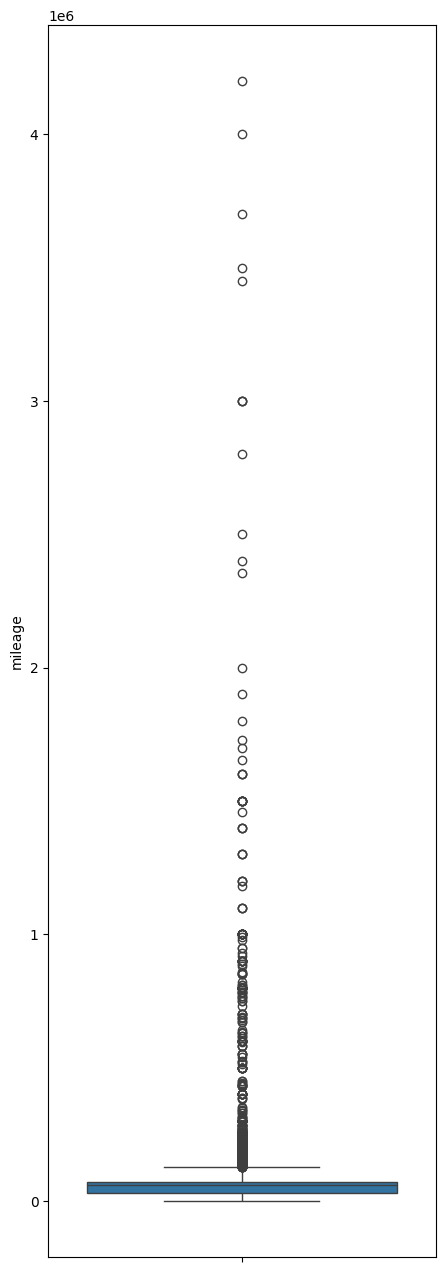

In [ ]:
plt.figure(figsize=(5,16))
sns.boxplot(car_data['mileage'])
plt.show()

The mileage information initially contained realistic values, but it also included outliers. The boxplot indicates the presence of several outliers within the mileage data. <br>
(Choosing mileage as an example since it has a lot of outlier)

In [ ]:
def remove_outlier(data):
  for i in data.columns:
    if (data[i].dtype != 'object') and (i != 'ad_id') and (i != 'year_of_manufacture'):
      q1 = data[i].quantile(0.25)
      q3 = data[i].quantile(0.75)
      iqr = q3 - q1
      lowerLimit = q1 - 1.5 * iqr
      upperLimit = q3 + 1.5 * iqr
      data = data[(data[i] >= lowerLimit) & (data[i] <= upperLimit)]
  return data

car_data = remove_outlier(car_data)

Remove outlier values from all numeric columns, excluding "ad_id" and "year_of_manufacture", as these two columns are not used for aggregation.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


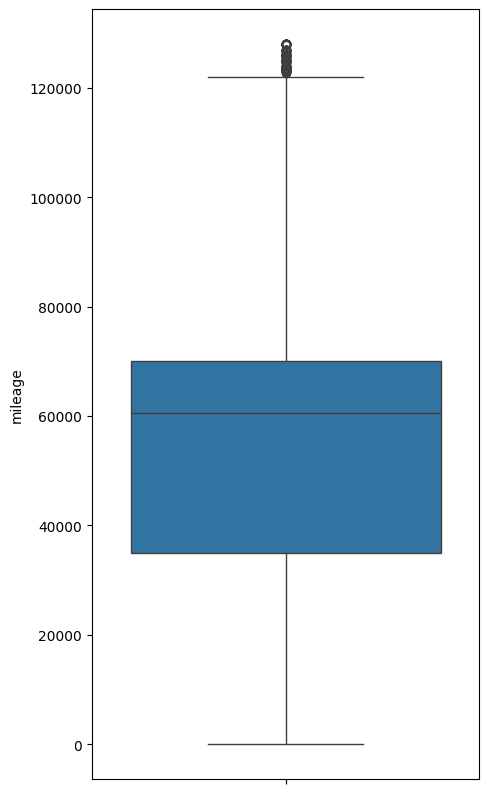

In [ ]:
plt.figure(figsize=(5,10))
sns.boxplot(car_data['mileage'])
plt.show()

Data has been adjusted to exclude outliers, resulting in a refined dataset that reflects more accurate values (as shown with mileage data boxplot).

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 0 to 30650
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                19940 non-null  int64  
 1   origin               19940 non-null  object 
 2   condition            19940 non-null  object 
 3   car_model            19940 non-null  object 
 4   mileage              19940 non-null  float64
 5   exterior_color       19940 non-null  object 
 6   interior_color       19940 non-null  object 
 7   num_of_doors         19940 non-null  object 
 8   seating_capacity     19940 non-null  object 
 9   engine               19940 non-null  object 
 10  transmission         19940 non-null  object 
 11  drive_type           19940 non-null  object 
 12  fuel_consumption     19940 non-null  float64
 13  brand                19940 non-null  object 
 14  grade                19940 non-null  object 
 15  year_of_manufacture  19940 non-null  int6

Before cleaning data: 30652 rows. After cleaning data: 19940 rows.

### (After cleaning) Mean, STD, Median of mileage, year of manufacturer, and price


In [ ]:
car_data[['mileage', 'year_of_manufacture', 'price (AUD)']].describe()


,mileage,year_of_manufacture,price (AUD)
count,19940.000,19940.000,19940.000
mean,54900.176,2017.576,24990.692
std,27058.545,4.928,10641.895
min,1.000,1990.000,1012.148
25%,35000.000,2015.000,17085.058
50%,60585.720,2019.000,24089.122
75%,70000.000,2021.000,34251.088
max,128000.000,2023.000,40485.920


### (After cleaning) Mode of mileage, year of manufacturer, price


In [ ]:
car_data[['mileage', 'year_of_manufacture', 'price (AUD)']].mode()


,mileage,year_of_manufacture,price (AUD)
0,60585.720,2023,40485.920


# Data Formatting

## a. Numerical Conversion

In [ ]:
car_data['num_of_doors'] = car_data['num_of_doors'].str.replace('-door', '')

In [ ]:
car_data['num_of_doors'] = car_data['num_of_doors'].astype(int)


In [ ]:
car_data['seating_capacity'] = car_data['seating_capacity'].str.replace('-seat', '')

In [ ]:
car_data['seating_capacity'] = car_data['seating_capacity'].astype(int)


Note: The mileage column is already in numerical format following the previous data cleaning process.

## b. Engine Feature Split

In [ ]:
car_data['type_of_engine'] = car_data['engine'].str.split('\t').str[0]  #there's a tab character that could be use for splitting

In [ ]:
car_data['engine_capacity'] = car_data['engine'].str.split('\t').str[1]  #there's a tab character that could be use for splitting
car_data['engine_capacity'] = car_data['engine_capacity'].str.replace(' L', '')
car_data['engine_capacity'] = car_data['engine_capacity'].astype(float)  #convert to float

## c. Standardizing Text Data

In [ ]:
car_data['interior_color'] = car_data['interior_color'].str.replace('gray', 'grey')

We removed any invalid or incorrect information from both the exterior and interior color columns and standardized the spelling for the color "grey."

In [ ]:
car_data['origin'] = car_data['origin'].str.lower()


In [ ]:
car_data['condition'] = car_data['condition'].str.lower()


In [ ]:
car_data['car_model'] = car_data['car_model'].str.lower()


In [ ]:
car_data['exterior_color'] = car_data['exterior_color'].str.lower()


In [ ]:
car_data['interior_color'] = car_data['interior_color'].str.lower()


In [ ]:
car_data['type_of_engine'] = car_data['type_of_engine'].str.lower()


In [ ]:
car_data['transmission'] = car_data['transmission'].str.lower()


In [ ]:
car_data['drive_type'] = car_data['drive_type'].str.lower()


In [ ]:
car_data['brand'] = car_data['brand'].str.lower()


In [ ]:
car_data['grade'] = car_data['grade'].str.lower()


## d. Numerical Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
columns_to_normalize = ['mileage','engine_capacity', 'num_of_doors', 'seating_capacity', 'fuel_consumption', 'price (AUD)']

In [ ]:
normalize_column = columns_to_normalize.copy()
for i in range(len(columns_to_normalize)):
    normalize_column[i] = 'normalised_'+columns_to_normalize[i]

In [ ]:
car_data[normalize_column] = scaler.fit_transform(car_data[columns_to_normalize])

In [ ]:
car_data[normalize_column]

,normalised_mileage,normalised_engine_capacity,normalised_num_of_doors,normalised_seating_capacity,normalised_fuel_consumption,normalised_price (AUD)
0,0.393,0.138,0.000,0.000,0.114,0.230
2,0.441,0.310,1.000,0.429,0.608,0.882
3,0.473,0.276,1.000,0.214,0.489,0.748
4,0.441,0.310,1.000,0.429,0.608,0.846
5,0.737,0.138,1.000,0.000,0.500,0.281
...,...,...,...,...,...,...
30622,0.375,0.207,0.667,0.214,0.196,0.415
30630,0.312,0.181,1.000,0.214,0.084,0.308
30637,0.503,0.310,0.667,0.214,0.608,0.268
30643,0.441,0.224,1.000,0.214,0.290,0.486


# Data Storage

## a. Cars Table

This creates and stores a table for 'Cars' containing the dataset after cleaning and formatting, with the datatypes as specified.
First we create a connection to the SQLite database file 'cars_database.db'.
As it does not exist yet, it is instead created.
The code below works as follows:


*   con is the connection object for the SQL queries
*   cur is the cursor object which is used to interact with the database.

*   cur.execute() creates the new table using sql inside the parentheses.







In [ ]:
con = sqlite3.connect('cars_dataset.db')
cur = con.cursor()

cur.execute('''
CREATE TABLE IF NOT EXISTS Cars (
    ad_id INTEGER PRIMARY KEY,
    car_name VARCHAR(255),
    origin VARCHAR(255),
    condition VARCHAR(255),
    exterior_color VARCHAR(255),
    car_model VARCHAR(255),
    year_of_manufacture VARCHAR(255),
    transmission VARCHAR(255),
    price INTEGER,
    drive_type VARCHAR(255)
)
''')

Create new dataframe 'cars_db'.

In [ ]:
cars_db = car_data[['ad_id','car_name', 'origin', 'condition', 'exterior_color', 'car_model',
'year_of_manufacture','transmission', 'price (AUD)', 'drive_type']]

Need to rename 'price (AUD)' column to 'price'.

In [ ]:
cars_db = cars_db.rename(columns={'price (AUD)': 'price'})

This command writes the dataframe to a SQLite database.

In [ ]:
cars_db.to_sql('Cars', con, if_exists='replace',index=False)

19940

Save changes to the database and close the connection.

In [ ]:
con.commit()
con.close()

## b. Sellers Table

Create and store a table for 'Sellers'

In [ ]:
con = sqlite3.connect('seller_dataset.db', timeout=10)
cur = con.cursor()

In [ ]:
cur.execute('''
    CREATE TABLE IF NOT EXISTS Sellers (
      ad_id INTEGER PRIMARY KEY,
       seller TEXT
    );
''')

Rename 'name' column to 'seller_name' to match the database schema

Insert data into the Sellers table

In [ ]:
sellers_data.to_sql('Sellers', con, if_exists='replace', index=False)

30652

Save changes to the database and close the connection.

In [ ]:
con.commit()
con.close()

In [ ]:
print(sellers_data)

         ad_id                       name
0        17042            Suzuki - Sydney
1        53794         Toyota - Melbourne
2        73954          Toyota - Brisbane
3        74150             Toyota - Perth
4        87573          Toyota - Adelaide
...        ...                        ...
30647  4930130          Nissan - Maitland
30648  4930142             Lexus - Burnie
30649  4930143             Ford - Bunbury
30650  4930144  Mercedes Benz - Gladstone
30651  4930147          Audi - Hervey Bay

[30652 rows x 2 columns]


## c. Combined Table

Create a combined table

In [ ]:
merged_con = sqlite3.connect('combined_dataset.db')

Retrieve the required columns from both the 'Cars' and 'Sellers' tables. The 'read_sql_query' function is used to read SQL queries into a dataframe.

In [ ]:

cars_con = sqlite3.connect('cars_dataset.db')
cars_data = pd.read_sql_query('SELECT ad_id, car_name, price FROM Cars', cars_con)
cars_con.close()

In [ ]:

sellers_con = sqlite3.connect('seller_dataset.db')
sellers_data = pd.read_sql_query('SELECT ad_id, name FROM Sellers', sellers_con)
sellers_con.close()

Combine the columns from both tables into one table. We used inner join.

In [ ]:
combined_table = pd.merge(cars_data, sellers_data, on='ad_id', how='inner')

In [ ]:
combined_table.to_sql('CombinedData', merged_con, if_exists='replace', index=False)

19940

We will check the first few rows of the merged table.

In [ ]:
combined_table_preview = pd.read_sql_query('SELECT * FROM CombinedData', merged_con)

print(combined_table_preview.head())

   ad_id                               car_name     price               name
0  17042   Suzuki Super Carry Truck 1.0 MT 2022 10080.994    Suzuki - Sydney
1  73954        Toyota Innova G 2.0 AT 2023 car 35830.039  Toyota - Brisbane
2  74150         Toyota Corolla Cross 1.8G 2023 30526.384     Toyota - Perth
3  87573        Toyota Innova G 2.0 AT 2022 car 34413.032  Toyota - Adelaide
4  97011  Suzuki Super Carry Van Blind Van 2023 12105.290  Suzuki - Canberra


In [ ]:
print(combined_table)

         ad_id                               car_name     price  \
0        17042   Suzuki Super Carry Truck 1.0 MT 2022 10080.994   
1        73954        Toyota Innova G 2.0 AT 2023 car 35830.039   
2        74150         Toyota Corolla Cross 1.8G 2023 30526.384   
3        87573        Toyota Innova G 2.0 AT 2022 car 34413.032   
4        97011  Suzuki Super Carry Van Blind Van 2023 12105.290   
...        ...                                    ...       ...   
19935  4930086             Hyundai Accent 1.4 MT 2020 17408.946   
19936  4930098          Hyundai i10 Grand 1.2 MT 2019 13157.924   
19937  4930111    Mercedes Benz C class C300 AMG 2020 11578.973   
19938  4930123          MG ZS Comfort 1.5 AT 2WD 2020 20202.474   
19939  4930144             Mercedes Benz GLC 200 2020 40485.920   

                             name  
0                 Suzuki - Sydney  
1               Toyota - Brisbane  
2                  Toyota - Perth  
3               Toyota - Adelaide  
4              

In [ ]:
merged_con.commit()
merged_con.close()

# Data Visualization

## I. Examine the relationship between 'mileage' and 'price' .

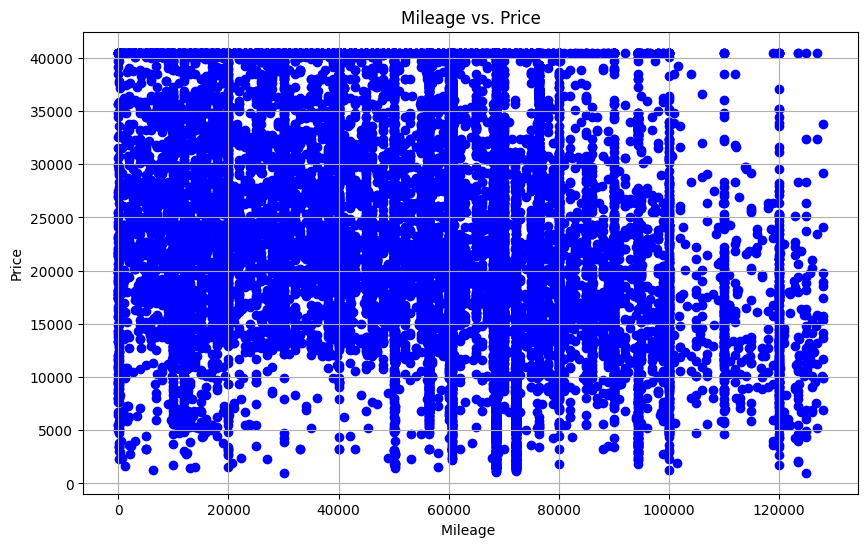

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(car_data['mileage'], car_data['price (AUD)'], color='blue', marker='o')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage ')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plt.legend()
plt.grid(True)

In [ ]:
correlation = car_data['mileage'].corr(car_data['price (AUD)'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.2380250520801771



*   There is a slight correlation between mileage and price.
*   A negative correlation exists, indicating that cars with higher mileage tend to have lower prices.
*   The data appears to be widely spread, which reduces the strength of any linear correlation.
*   Other factors, such as car brand, car type, engine type, and engine displacement, may provide a better indication of car prices when combined.


## II. Analyze the trend of car prices over the 'year_of_m'.

#### Created copy of data

In [ ]:
price_over_manufacture_year = car_data.copy()

The copy of data has been made to prevent changes from apply back to original data

#### Information for new cars

In [ ]:
new_price_over_manufacture_year = price_over_manufacture_year[price_over_manufacture_year['condition'] != 'used car']
new_price_over_manufacture = new_price_over_manufacture_year[['year_of_manufacture','price (AUD)']].groupby(['year_of_manufacture'], as_index=False).mean()

In [ ]:
new_car_year_amount = new_price_over_manufacture_year[['year_of_manufacture','price (AUD)']].groupby(['year_of_manufacture'], as_index=False).count()

#### The amount of new cars based on year of manufacturing

In [ ]:
new_car_year_amount.rename(columns={'price (AUD)': 'amount_of_cars'}, inplace=True)
new_car_year_amount

,year_of_manufacture,amount_of_cars
0,2021,4
1,2022,1188
2,2023,2585


#### Information for used cars

In [ ]:
used_price_over_manufacture_year = price_over_manufacture_year[price_over_manufacture_year['condition'] != 'new car']
used_price_over_manufacture = used_price_over_manufacture_year[['year_of_manufacture','price (AUD)']].groupby(['year_of_manufacture'], as_index=False).mean()

In [ ]:
used_car_year_amount = used_price_over_manufacture_year[['year_of_manufacture','price (AUD)']].groupby(['year_of_manufacture'], as_index=False).count()

#### The amount of used car based on year of manufacturing

In [ ]:
used_car_year_amount.rename(columns={'price (AUD)': 'amount_of_cars'}, inplace=True)
used_car_year_amount

,year_of_manufacture,amount_of_cars
0,1990,5
1,1991,4
2,1992,7
3,1993,8
4,1994,7
5,1995,5
6,1996,6
7,1997,6
8,1998,10
9,1999,7


#### Remove year before 2004

In [ ]:
used_price_over_manufacture = used_price_over_manufacture[used_price_over_manufacture['year_of_manufacture'] > 2003]


*   The very low number of used cars makes it challenging to derive meaningful insights, as it represents only a small sample group.
*   We removed cars information from years prior to 2004, as the number of cars manufactured in those years is lower than the median.



#### Visualize correlation between price and manufacturing year

Text(0, 0.5, 'Price')

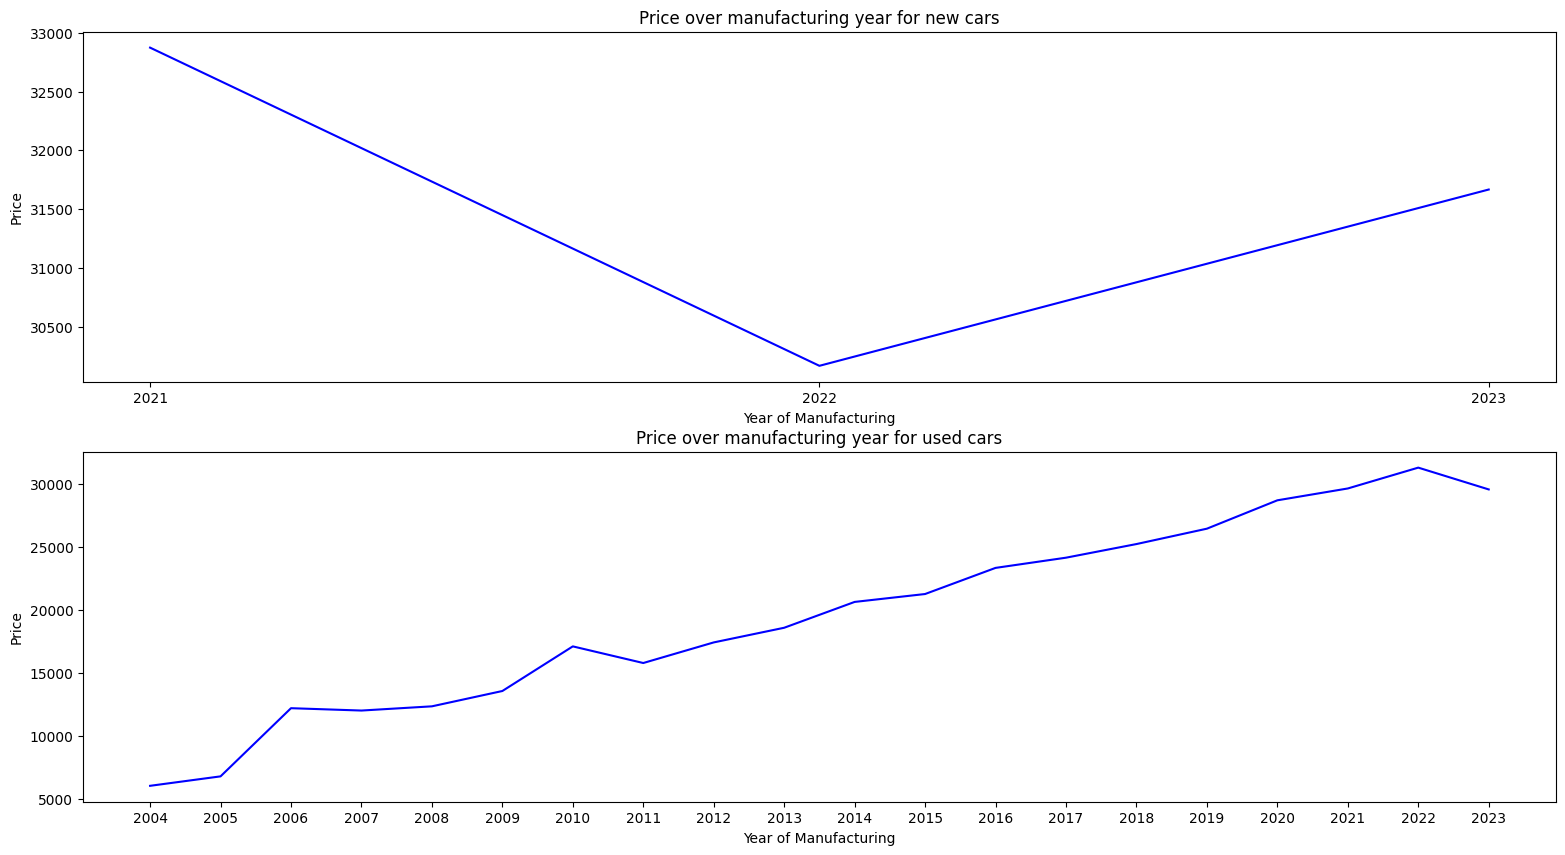

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(19, 10))
axis[0].plot((new_price_over_manufacture['year_of_manufacture']).astype(str), new_price_over_manufacture['price (AUD)'], color = 'blue')
axis[0].set_title('Price over manufacturing year for new cars')
axis[0].set_xlabel('Year of Manufacturing')
axis[0].set_ylabel('Price')
axis[1].plot((used_price_over_manufacture['year_of_manufacture']).astype(str), used_price_over_manufacture['price (AUD)'], color = 'blue')
axis[1].set_title('Price over manufacturing year for used cars')
axis[1].set_xlabel('Year of Manufacturing')
axis[1].set_ylabel('Price')

#### The amount of 2010-2012 cars based on "car_model"

In [ ]:
used_mileage_over_year = used_price_over_manufacture_year[(used_price_over_manufacture_year['year_of_manufacture'] < 2013) & (used_price_over_manufacture_year['year_of_manufacture'] > 2009)]
used_mileage_over_year = used_mileage_over_year[['year_of_manufacture', 'car_model', 'mileage']].groupby(['year_of_manufacture','car_model'], as_index=False).count()
used_mileage_over_year.rename(columns={'mileage': 'amount_of_cars'}, inplace=True)
used_mileage_over_year

,year_of_manufacture,car_model,amount_of_cars
0,2010,4x4,8
1,2010,convertible/cabriolet,6
2,2010,coupe,10
3,2010,crossover,43
4,2010,hatchback,74
5,2010,sedan,222
6,2010,suv,133
7,2010,van/minivan,15
8,2011,4x4,13
9,2011,convertible/cabriolet,1


#### Summarize information about car make in 2010

In [ ]:
used_mileage_2010 = used_price_over_manufacture_year[used_price_over_manufacture_year['year_of_manufacture'] == 2010]
used_mileage_2010[['fuel_consumption','mileage','price (AUD)']].describe()

,fuel_consumption,mileage,price (AUD)
count,511.000,511.000,511.000
mean,71.934,73726.287,17111.917
std,10.367,30947.853,10214.226
min,50.000,4.000,2631.585
25%,66.321,60585.720,10323.910
50%,74.313,72288.682,13724.727
75%,80.000,97500.000,19939.316
max,90.000,128000.000,40485.920


#### Summarize information about car make in 2011

In [ ]:
used_mileage_2011 = used_price_over_manufacture_year[used_price_over_manufacture_year['year_of_manufacture'] == 2011]
used_mileage_2011[['fuel_consumption','mileage','price (AUD)']].describe()

,fuel_consumption,mileage,price (AUD)
count,528.000,528.000,528.000
mean,69.005,72196.402,15791.196
std,10.314,30609.736,9190.787
min,50.000,6.000,2388.669
25%,60.000,60585.720,10323.910
50%,69.814,72288.682,13016.223
75%,79.608,94338.890,17611.375
max,90.000,127000.000,40485.920


#### Summarize information about car make in 2012

In [ ]:
used_mileage_2012 = used_price_over_manufacture_year[used_price_over_manufacture_year['year_of_manufacture'] == 2012]
used_mileage_2012[['fuel_consumption','mileage','price (AUD)']].describe()

,fuel_consumption,mileage,price (AUD)
count,282.000,282.000,282.000
mean,70.243,74098.304,17426.461
std,10.080,29168.316,8478.004
min,50.000,1.000,3036.444
25%,61.590,60585.720,12024.318
50%,70.000,72288.682,14979.790
75%,79.734,93500.000,20647.819
max,90.000,125000.000,40485.920


- We have separated new cars and used cars, as vehicles with the same specifications, model, and model year will typically experience depreciation once they have been used.
- The price of cars shows a strong positive correlation with the year of manufacture, indicating that newer cars tend to have higher prices.
- There are additional factors contributing to car prices beyond just the year of manufacture. For instance, the drop in average price for 2011 cars suggests that further investigation is needed to identify the underlying causes, even with a more detailed analysis of the data.

## III. Compare the average prices among different 'car_models'.

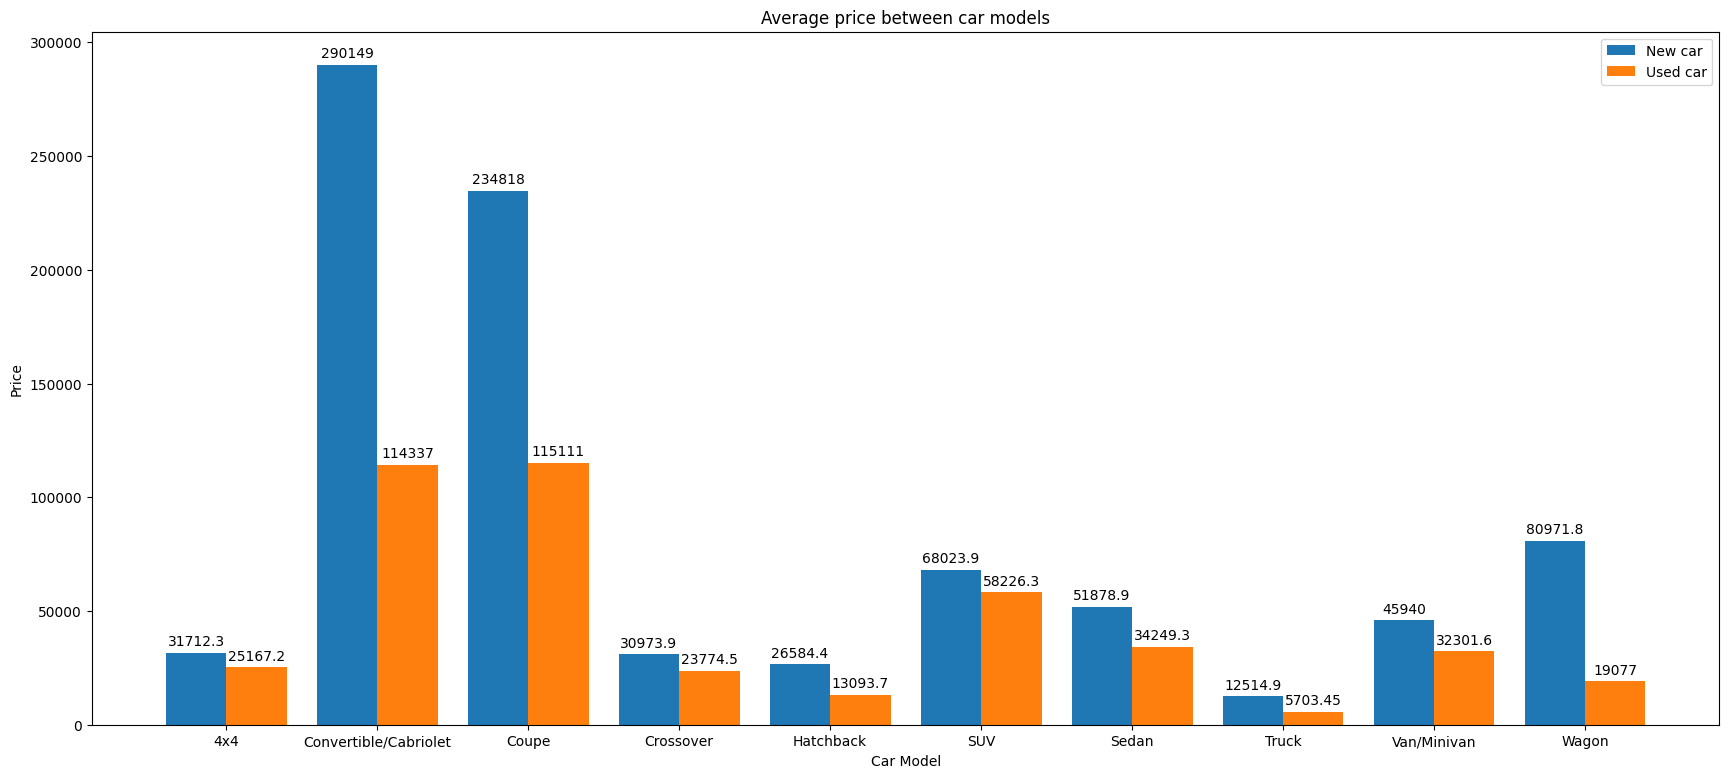

In [ ]:
average_new_car = car_data_outlier[car_data_outlier['condition'] != 'Used car']
average_new_car_model = average_new_car[['car_model', 'price (AUD)']].groupby(['car_model'], as_index=False).mean()
average_used_car = car_data_outlier[car_data_outlier['condition'] != 'New car']
average_used_car_model = average_used_car[['car_model', 'price (AUD)']].groupby(['car_model'], as_index=False).mean()
car_model = np.arange(len(average_new_car_model['car_model']))
body_type = average_new_car_model['car_model']
avg_price = {
    'New car': average_new_car_model['price (AUD)'],
    'Used car': average_used_car_model['price (AUD)']
}
width = 0.4
multiplier = 0
fig, ax = plt.subplots(figsize=(21, 9))
for condition, price in avg_price.items():
    offset = width * multiplier
    car_graph = ax.bar(car_model + offset, price, 0.4, label=condition)
    ax.bar_label(car_graph, padding=3)
    multiplier += 1
ax.set_xticks(car_model+(width/2), body_type)
ax.set_title('Average price between car models')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.legend()

#### Amount of new cars based on "car_model"

In [ ]:
count_car_model = average_new_car[['car_model', 'price (AUD)']].groupby(['car_model'], as_index=False).count()
count_car_model.rename(columns={'price (AUD)': 'amount_of_new_cars'}, inplace=True)
count_car_model

,car_model,amount_of_new_cars
0,4x4,532
1,Convertible/Cabriolet,6
2,Coupe,15
3,Crossover,468
4,Hatchback,131
5,SUV,2085
6,Sedan,1101
7,Truck,34
8,Van/Minivan,210
9,Wagon,1


#### Amount of used car based on "car_model"

In [ ]:
count_car_model = average_used_car[['car_model', 'price (AUD)']].groupby(['car_model'], as_index=False).count()
count_car_model.rename(columns={'price (AUD)': 'amount_of_used_cars'}, inplace=True)
count_car_model

,car_model,amount_of_used_cars
0,4x4,1247
1,Convertible/Cabriolet,62
2,Coupe,134
3,Crossover,1800
4,Hatchback,1898
5,SUV,6420
6,Sedan,7461
7,Truck,32
8,Van/Minivan,582
9,Wagon,5


#### Coupe price info

In [ ]:
coupe_data = car_data_outlier[car_data_outlier['car_model'] == 'Coupe']
coupe_data['price (AUD)'].describe()

,price (AUD)
count,149.000
mean,127162.199
std,169147.879
min,9514.191
25%,27449.454
50%,80971.840
75%,161943.680
max,1457493.124


#### Convertible price info

In [ ]:
convertible_data = car_data_outlier[car_data_outlier['car_model'] == 'Convertible/Cabriolet']
convertible_data['price (AUD)'].describe()

,price (AUD)
count,68.000
mean,129849.658
std,170830.664
min,17004.086
25%,40485.920
50%,80971.840
75%,121457.760
max,1133605.763


- We have separated new cars and used cars as per the previous task.
- We decided to retain the data before removing outliers to avoid losing too much information, particularly for coupes and convertibles, since most exotic cars typically have these body types. Additionally, most of the prices of the exotic cars fall outside the outlier range.
- According to the data, convertible and coupe cars rank among the most expensive types of vehicles.
- Both types exhibit high median prices, although their distributions differ: coupes are left-skewed, while convertibles are right-skewed.
- Wagons appear to depreciate the most; however, the overall number of wagons in the dataset is too low to draw definitive conclusions.
- SUVs, 4x4s, crossovers, and sedans tend to retain their value well, as the average price of used cars in these categories is not significantly different from that of new ones.
- In contrast, hatchbacks and trucks show a significant amount of depreciation.

## IV. Display the distribution of 'engine_capacity'.

In [ ]:
petrol_car = car_data[car_data['type_of_engine'] == 'petrol']
diesel_car = car_data[car_data['type_of_engine'] == 'diesel']
hybrid_car = car_data[car_data['type_of_engine'] == 'hybrid']

[Text(0, 0, '19'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '31'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '7')]

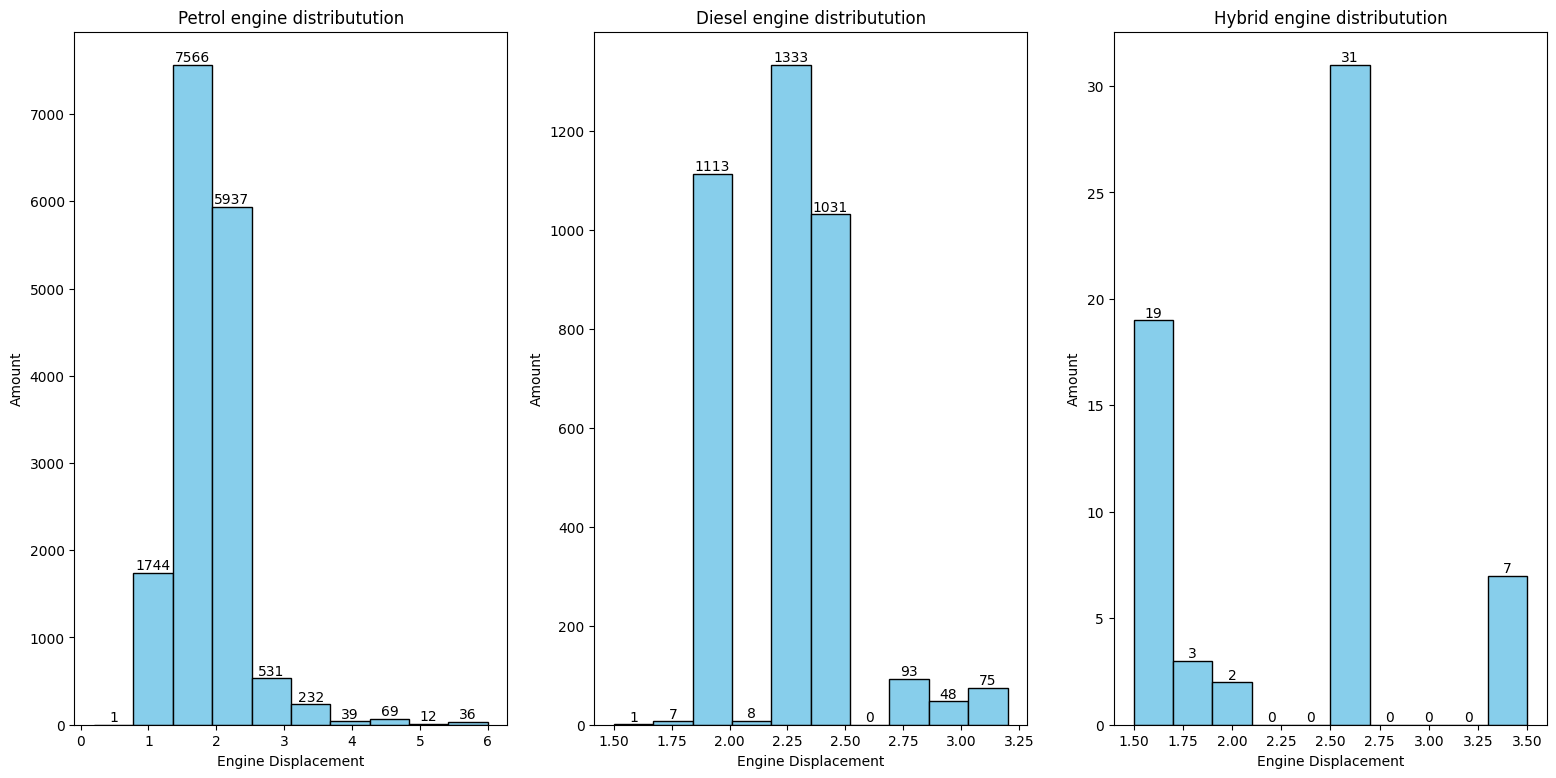

In [ ]:
figure, axis = plt.subplots(1, 3, figsize=(19, 9))
axis[0].hist(petrol_car['engine_capacity'], bins=10, color='skyblue', edgecolor='black')
axis[0].set_title('Petrol engine distributution')
axis[0].set_xlabel('Engine Displacement')
axis[0].set_ylabel('Amount')
axis[0].bar_label(axis[0].containers[0])
axis[1].hist(diesel_car['engine_capacity'], bins=10, color='skyblue', edgecolor='black')
axis[1].set_title('Diesel engine distributution')
axis[1].set_xlabel('Engine Displacement')
axis[1].set_ylabel('Amount')
axis[1].bar_label(axis[1].containers[0])
axis[2].hist(hybrid_car['engine_capacity'], bins=10, color='skyblue', edgecolor='black')
axis[2].set_title('Hybrid engine distributution')
axis[2].set_xlabel('Engine Displacement')
axis[2].set_ylabel('Amount')
axis[2].bar_label(axis[2].containers[0])

- We have separated the data by petrol, diesel, and hybrid engines, as each engine type has its own advantages and disadvantages, leading to different primary applications.
- The majority of petrol engines fall within the displacement range of 1.4 to 2.5 liters.
- Only petrol engines have displacements exceeding 3.5 liters.
- The majority of diesel engines have displacements ranging from 2.0 to 2.5 liters.
- Most hybrid engines are found in the displacement range of 2.5 to 2.7 liters.
- Hybrid engines represent the least common type among the vehicles in the dataset.

## V. Visualize the distribution of the cars’ exterior colors as the percentage of a whole.

#### Show amount of colour

In [ ]:
count_exterior_color = car_data[['exterior_color', 'price (AUD)']].groupby(['exterior_color'], as_index=False).count()
count_exterior_color.rename(columns={'price (AUD)': 'amount_of_exterior_color'}, inplace=True)
count_exterior_color.sort_values(by='amount_of_exterior_color', ascending=False)

,exterior_color,amount_of_exterior_color
12,white,6754
0,black,4056
8,red,2914
10,silver,1977
4,green,1500
5,grey,673
1,brown,609
9,sand,522
13,yellow,440
6,orange,262


#### Group top 5 lowest into "other"

In [ ]:
replacing_color = ['orange', 'copper', 'cream', 'pink', 'violet']
for i in replacing_color:
  car_data['exterior_color'] = car_data['exterior_color'].str.replace(i, 'others')

#### Visualize exterior color distribution

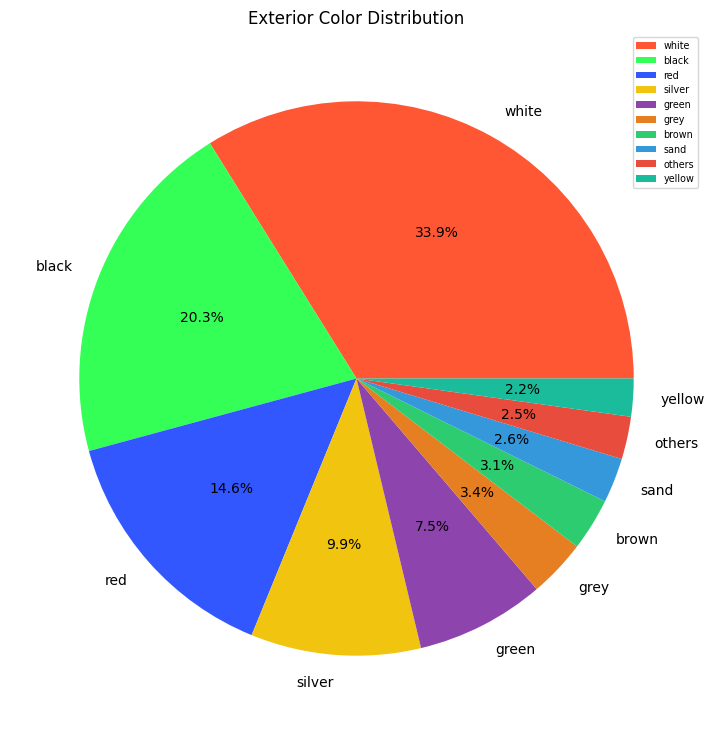

In [ ]:
plt.figure(figsize=(21, 9))
colors_list = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD', '#E67E22', '#2ECC71', '#3498DB', '#E74C3C', '#1ABC9C', '#9B59B6', '#34495E', '#F39C12', '#D35400']
plt.pie(car_data['exterior_color'].value_counts(), colors=colors_list, labels=car_data['exterior_color'].value_counts().index, autopct='%1.1f%%')
plt.legend(fontsize='x-small')
plt.title('Exterior Color Distribution')
plt.show()

- White is the most popular exterior color, followed by black and red.
- The combined percentage of the top five least popular colors is less than that of green, which ranks as the fifth most popular color.
- We decide to group the top 5 lowest amount of color as "other" to prevent label from getting in the way of each other. (The color we replace is orange, copper, cream, pink, violet)

## VI. Visualise/Identify correlations between these features: 'mileage', 'num_of_doors', 'seating_capacity', 'fuel_consumption', and 'price'.

#### To analyse these correlation we will create a correlation matrix. The advantage of a correlation matrix is that it can visualise and quantify numerous pairs of variables within a single plot.

In [ ]:
corr_matrix = car_data[['mileage', 'num_of_doors', 'seating_capacity', 'fuel_consumption', 'price (AUD)']].corr()

#### Set the size of the figure.

In [ ]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

#### Create the correlation matrix to compare the variables of 'mileage', 'num_of_doors', 'seating_capacity', 'fuel_consumption', and 'price'.

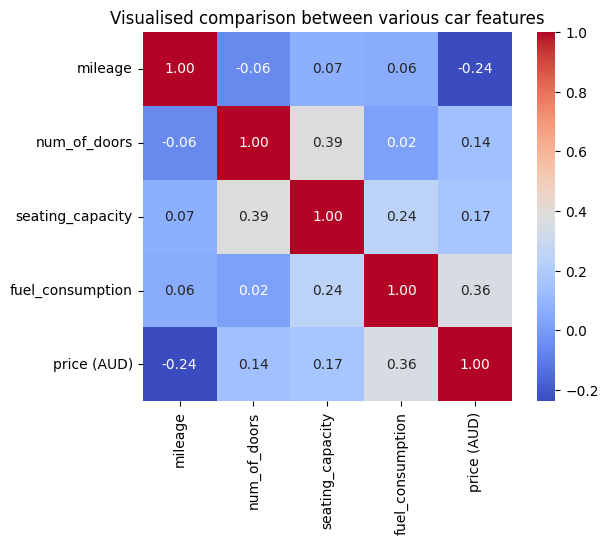

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Visualised comparison between various car features')
plt.show()

In this correlation matrix, each cell represent the correlation between two variables. Each variable is represented on both the x and y axis of the plot, hence the existance of cells with a value of 1, indicating identical correlation.
The closer the value gets to 1, the stronger the correlation. Likewise, negative values indicate an inverse correlation, with the closer the value to -1, the stronger the inverse correlation.
The strongest correlations between these variables are between seating capacity vs. number of doors, and price vs fuel consumption. Other notable correlations were price and number of doors and seating capacity. The only significant inverse correlation that was found was between the mileage and the price.